# 1. Pré-processamento de Dados (Limpeza e Transformação)

Nesta fase, preparamos os dados para a rede neural.

### 1.1. Carregamento dos Dados
Se você salvou o arquivo como dados_imoveis_sinteticos.csv, comece carregando-o:

In [1]:
import pandas as pd

# Carregue o DataFrame
df = pd.read_csv('dados_imoveis_sinteticos.csv')

# Exibir informações básicas para verificar tipos de dados e valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   preco            2000 non-null   float64
 1   area_m2          2000 non-null   float64
 2   quartos          2000 non-null   int64  
 3   banheiros        2000 non-null   int64  
 4   garagem          2000 non-null   int64  
 5   idade_do_imovel  2000 non-null   int64  
 6   latitude         2000 non-null   float64
 7   longitude        2000 non-null   float64
 8   bairro           2000 non-null   object 
 9   seguranca        2000 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 156.4+ KB
None


### 1.2. Tratamento de Variáveis Categóricas
As redes neurais não processam texto. Precisamos converter colunas como bairro e seguranca em formato numérico.

Codificação One-Hot (One-Hot Encoding): Transforma variáveis categóricas nominais (bairro) em colunas binárias.

Codificação de Rótulos (Label Encoding): Se seguranca for ordinal (1, 2, 3), já está em um formato utilizável.

In [2]:
# Aplicar One-Hot Encoding para a coluna 'bairro'
df = pd.get_dummies(df, columns=['bairro'], drop_first=True)

# Exibir as novas colunas
print(df.head())

       preco  area_m2  quartos  banheiros  garagem  idade_do_imovel  \
0  598822.54   162.24        2          2        1               27   
1  587850.23    33.66        4          3        0               26   
2  695408.07    67.80        2          2        3               31   
3  796528.41   119.37        4          3        2               41   
4  735700.67    82.17        2          3        1               34   

    latitude  longitude  seguranca  bairro_Centro  bairro_Jardim Sul  \
0 -23.554491 -46.620878          3          False              False   
1 -23.695596 -46.608551          2          False              False   
2 -23.685525 -46.609746          2          False              False   
3 -23.532111 -46.542264          2          False              False   
4 -23.542334 -46.661199          2          False              False   

   bairro_Vila Nobre  bairro_Zona Leste  
0              False              False  
1               True              False  
2             

### 1.3. Definição de Variáveis (X e Y)
Separe as Características (X), que são as colunas de entrada, da Variável Alvo (Y), que é o preço.

In [3]:
# Variável Alvo (Y)
Y = df['preco']

# Variáveis de Entrada (X) - remova 'preco' e a coluna de segurança, se ela já estiver codificada
# Se seguranca for numérica (1, 2, 3), ela deve ser incluída em X.
X = df.drop(columns=['preco'])

### 1.4. Escalonamento de Dados (Scaling)
As redes neurais funcionam melhor quando os dados de entrada estão em uma faixa semelhante. Vamos usar o StandardScaler para obter média 0 e desvio padrão 1.

In [4]:
from sklearn.preprocessing import StandardScaler

# Apenas escalone as colunas numéricas que não foram codificadas
colunas_para_escalonar = ['area_m2', 'quartos', 'banheiros', 'garagem', 'idade_do_imovel', 'latitude', 'longitude']
scaler = StandardScaler()

# Ajusta e transforma as colunas em X
X[colunas_para_escalonar] = scaler.fit_transform(X[colunas_para_escalonar])

print(X.head())

    area_m2   quartos  banheiros   garagem  idade_do_imovel  latitude  \
0  1.779734 -0.739940   0.004395 -0.501500         0.197485  0.810229   
1 -1.468995  1.950751   1.469306 -1.802409         0.128350 -1.642614   
2 -0.606407 -0.739940   0.004395  2.100317         0.474027 -1.467549   
3  0.696572  1.950751   1.469306  0.799408         1.165381  1.199263   
4 -0.243331 -0.739940   1.469306 -0.501500         0.681433  1.021556   

   longitude  seguranca  bairro_Centro  bairro_Jardim Sul  bairro_Vila Nobre  \
0  -0.358038          3          False              False              False   
1  -0.143896          2          False              False               True   
2  -0.164655          2          False              False               True   
3   1.007626          2          False              False              False   
4  -1.058485          2          False              False               True   

   bairro_Zona Leste  
0              False  
1              False  
2          

# 2. Divisão dos Dados (Treinamento e Teste)
Divida o seu conjunto de dados para treinamento e avaliação final. Usaremos a divisão padrão de 80% para treino e 20% para teste.

In [5]:
from sklearn.model_selection import train_test_split

# Dividir os dados: 80% treino, 20% teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treinamento: 1600 amostras
Tamanho do conjunto de teste: 400 amostras


# 3. Arquitetura e Treinamento da Rede Neural
Usaremos a biblioteca Keras (que faz parte do TensorFlow) para construir e treinar o modelo de Perceptron Multicamadas (MLP).

### 3.1. Construção do Modelo (Arquitetura)
Vamos criar uma arquitetura simples e robusta para começar:

Camada de Entrada: Recebe o número de features (X_train.shape[1]).

Camada Oculta 1: 64 neurônios com ativação ReLU.

Camada Oculta 2: 32 neurônios com ativação ReLU.

Camada de Saída: 1 neurônio com ativação Linear (para regressão).

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# O número de entradas (features) é o número de colunas em X_train
input_features = X_train.shape[1]

model = Sequential([
    # Camada Oculta 1
    Dense(64, activation='relu', input_shape=(input_features,)),
    # Camada Oculta 2
    Dense(32, activation='relu'),
    # Camada de Saída (para Regressão)
    Dense(1, activation='linear')
])

print("\n--- Sumário da Arquitetura da Rede Neural ---")
model.summary()


--- Sumário da Arquitetura da Rede Neural ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

### 3.2. Compilação e Treinamento
Compilação: Definimos o Otimizador (adam) e a Função de Perda (mse - Mean Squared Error) para regressão.

Treinamento: O modelo aprende usando o conjunto de treino.

In [7]:
# 1. Compilação
model.compile(optimizer='adam',
              loss='mse', # Mean Squared Error (Erro Quadrático Médio)
              metrics=['mae']) # Mean Absolute Error (Erro Absoluto Médio - Mais fácil de interpretar)

# 2. Treinamento
# epochs: Número de vezes que a rede verá o dataset completo
# batch_size: Quantidade de amostras processadas antes de atualizar os pesos
history = model.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=32,
                    verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 616914485248.0000 - mae: 739269.3750
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 610700951552.0000 - mae: 733159.6875
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 614891847680.0000 - mae: 735450.7500
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 608954548224.0000 - mae: 733869.9375
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 607963906048.0000 - mae: 733872.6875
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 608400703488.0000 - mae: 733261.9375
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 606407229440.0000 - mae: 731000.3125
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 614491422720.0000 - mae: 734691.2500
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 621177405440.0000 - mae: 739701.9375
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 621810548736.0000 - mae: 739924.5000
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━

# 4. Fazendo as Previsões
Primeiro, use o modelo para gerar as previsões de preço (Y_pred) para o conjunto de dados que ele nunca viu (X_test).

In [8]:
# Importar numpy para cálculos eficientes (RMSE)
import numpy as np
# Importar métricas do scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Gerar as previsões no conjunto de teste
Y_pred = model.predict(X_test).flatten()
# .flatten() é usado para transformar a saída (que é uma matriz 2D) em um vetor 1D

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


# 5. Cálculo das Métricas de Avaliação 📈
Vamos calcular as três métricas essenciais para regressão: RMSE, MAE e R².

### 5.1. Raiz do Erro Quadrático Médio (RMSE)

O RMSE é a métrica mais usada em regressão. Ele penaliza erros maiores de forma mais severa e está na mesma unidade da variável alvo (em Real (moeda)), o que o torna altamente interpretável.
$$\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}$$

Interpretação: Se o seu RMSE for, por exemplo, 50.000 reais, isso significa que, em média, as previsões do modelo erram por cerca de R$ 50.000 para mais ou para menos.

In [9]:
# 1. Calcular o Erro Quadrático Médio (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# 2. Calcular a Raiz do Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mse)

print(f"RMSE (Raiz do Erro Quadrático Médio): R$ {rmse:,.2f}")

RMSE (Raiz do Erro Quadrático Médio): R$ 155,068.61


### 5.2. Erro Absoluto Médio (MAE)
O MAE mede a média dos erros absolutos. É menos sensível a outliers do que o RMSE.$$\text{MAE} = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|$$

Interpretação: Se o seu MAE for 35.000 reais, significa que o erro médio absoluto de todas as suas previsões é de R$ 35.000.

In [10]:
# Calcular o Erro Absoluto Médio (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"MAE (Erro Absoluto Médio): R$ {mae:,.2f}")

MAE (Erro Absoluto Médio): R$ 121,158.77


### 5.3. Coeficiente de Determinação ($R^2$)

O R² (ou R-squared) mede o quão bem o seu modelo se ajusta aos dados, em comparação com um modelo base que simplesmente prevê a média de $Y$.
* Fórmula (Conceito): Média da variância explicada.

* Interpretação:
  * Um valor próximo de 1,0 indica um ajuste quase perfeito (o modelo explica quase toda a variação no preço).

  * Um valor próximo de 0,0 indica que o modelo não é melhor do que prever a média.

In [11]:
# Calcular o Coeficiente de Determinação (R²)
r2 = r2_score(Y_test, Y_pred)

print(f"R² (Coeficiente de Determinação): {r2:.4f}")

R² (Coeficiente de Determinação): 0.6810


# 6. Análise Visual

### 6.1. Gráfico de Dispersão (Real vs. Previsto)
Um gráfico de dispersão que plota os preços reais no eixo X e os preços previstos no eixo Y deve formar uma nuvem de pontos próxima a uma linha diagonal de 45 graus. Quanto mais apertada a nuvem de pontos em torno dessa linha, melhor a performance do modelo.

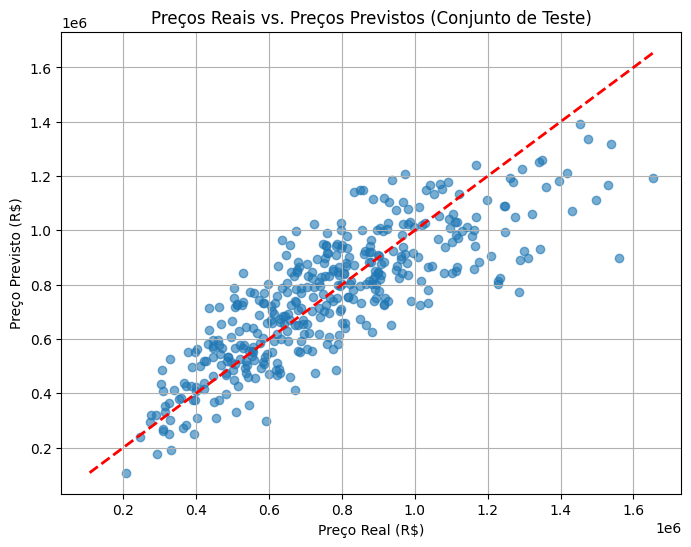

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.6) # Y_test no eixo X (Real) vs Y_pred no eixo Y (Previsto)

# Adiciona a linha de 45 graus (onde Y_pred = Y_test)
max_val = max(Y_test.max(), Y_pred.max())
min_val = min(Y_test.min(), Y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.title('Preços Reais vs. Preços Previstos (Conjunto de Teste)')
plt.xlabel('Preço Real (R$)')
plt.ylabel('Preço Previsto (R$)')
plt.grid(True)
plt.show()

### Análise do Gráfico de Dispersão Acima
O gráfico gerado demonstra a performance do modelo no conjunto de teste.
1. Linha de Referência (Linha Vermelha Tracejada):
  * A linha vermelha tracejada representa a previsão perfeita ($Y_{previsto} = Y_{real}$), também conhecida como a linha de 45 graus.
  * Idealmente, todos os seus pontos azuis deveriam cair exatamente sobre essa linha.

2. Dispersão dos Pontos (Pontos Azuis):
  * Ajuste Geral: A nuvem de pontos azuis está bem concentrada em torno da linha vermelha. Isso indica que, de forma geral, o modelo capturou a relação entre as características do imóvel e seu preço. Você deve ter obtido um valor de $R^2$ decente (provavelmente acima de 0.7 ou 0.8), o que é um bom começo.
   * Distribuição: O modelo parece ter um bom desempenho em toda a faixa de preços, desde os mais baixos (200k de Reais) até os mais altos (1.6M de Reais).

3. Áreas de Maior Erro (Dispersão) -
Apesar do bom ajuste geral, observe os erros:
  
  * Subestimação (Pontos abaixo da linha): Existem pontos onde o Preço Real é alto, mas o Preço Previsto é baixo. Por exemplo, na faixa de  1.4M de Reais (Eixo X), há alguns pontos caindo abaixo de 1.2M de Reais (Eixo Y). Nesses casos, o corretor subestimaria o preço.

  * Superestimação (Pontos acima da linha): Existem pontos onde o Preço Real é baixo, mas o Preço Previsto é alto. Por exemplo, na faixa de  0.4M de Reais (Eixo X), há alguns pontos acima de  0.6M de Reais (Eixo Y). Nesses casos, o corretor superestimaria o preço.

# 7. Otimização e Ajustes:
Para refinar o modelo. O foco deve ser em reduzir o overfitting (se o modelo foi treinado por muitas épocas) e encontrar uma arquitetura mais eficiente.

### 7.1. Regularização (Reduzir Overfitting):
O overfitting ocorre quando o modelo memoriza os dados de treinamento, mas falha ao generalizar para novos dados (o conjunto de teste).

Dropout: É a técnica mais popular para RNAs. Durante o treinamento, ela desliga aleatoriamente uma porcentagem de neurônios nas camadas ocultas. Isso força a rede a aprender padrões mais robustos e evita que ela dependa excessivamente de um único caminho ou recurso.

In [13]:
from tensorflow.keras.layers import Dropout

# Reconstruindo a arquitetura com Dropout
model_otimizado = Sequential([
    Dense(128, activation='relu', input_shape=(input_features,)),
    Dropout(0.2),  # Desliga 20% dos neurônios
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 7.2. Ajuste de Hiperparâmetros (Arquitetura):
Você pode experimentar diferentes configurações na sua Rede Neural (RNA):

Número de Neurônios: Tente aumentar o número de neurônios nas camadas ocultas (ex: de 64 para 128) para dar mais capacidade de aprendizado ao modelo, ou diminuir para simplificá-lo se houver overfitting.

Número de Camadas: Experimente adicionar uma terceira camada oculta para tentar capturar relações mais complexas.

### 7.3. Early Stopping (Parada Antecipada):
É uma técnica que impede o overfitting interrompendo o treinamento quando o desempenho do modelo no conjunto de validação (que você pode separar do treino) para de melhorar.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Define o callback para monitorar o MAE no conjunto de validação
# monitor='val_mae': monitora o Erro Absoluto Médio no conjunto de validação
# patience=10: se não houver melhoria por 10 épocas, o treino para
early_stop = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)

# Ao treinar, use um conjunto de validação
# history = model.fit(X_train, Y_train, ..., validation_split=0.1, callbacks=[early_stop])

Vamos aplicar o Dropout e utilizar o Early Stopping para treinar um modelo otimizado.
Essas técnicas ajudarão a mitigar o risco de overfitting e, potencialmente, melhorar a precisão do modelo no conjunto de teste.
Para realizar a otimização, vamos:

1. Ajustar a Arquitetura (adicionar Dropout).

2. Configurar Callbacks (adicionar EarlyStopping).

3. Retreinar o Modelo usando uma parte dos dados de treino para validação.

4. Reavaliar o desempenho.

# 1. Implementando o Dropout e Early Stopping
Vamos redefinir o modelo, mas desta vez faremos a divisão do treinamento em Treino e Validação.

### 1.1. Configuração do Early Stopping
O EarlyStopping monitorará uma métrica (como o MAE) no conjunto de validação e interromperá o treinamento se a métrica não melhorar após um número específico de épocas (patience).

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Definir o callback Early Stopping
# monitor='val_mae': monitora o Erro Absoluto Médio no conjunto de validação
# patience=15: espera 15 épocas sem melhora antes de parar
# restore_best_weights=True: usa os pesos do melhor modelo (antes da parada)
early_stop = EarlyStopping(monitor='val_mae', patience=15, restore_best_weights=True)

# O número de entradas (features) é o mesmo
input_features = X_train.shape[1]

### 1.2. Arquitetura com Dropout
Vamos usar uma arquitetura ligeiramente maior (128 e 64 neurônios) para dar mais capacidade ao modelo e, em seguida, aplicar o Dropout(0.2) (desligar 20% dos neurônios) para regularizá-lo.

In [16]:
# 2. Construção da Arquitetura Otimizada
model_otimizado = Sequential([
    # Camada Oculta 1 (Maior capacidade)
    Dense(128, activation='relu', input_shape=(input_features,)),
    Dropout(0.2),  # Regularização

    # Camada Oculta 2
    Dense(64, activation='relu'),
    Dropout(0.2),  # Regularização

    # Camada de Saída (Regressão)
    Dense(1, activation='linear')
])

# 3. Compilação
model_otimizado.compile(optimizer='adam',
                        loss='mse',
                        metrics=['mae'])

# 2. Treinamento Otimizado
Agora, treinamos o modelo usando o callback early_stop e o parâmetro validation_split, que separa automaticamente uma parte do X_train para validação.

In [17]:
print("\n--- Iniciando Treinamento Otimizado com Early Stopping ---")

# 4. Treinamento
# validation_split=0.1: 10% do X_train será usado para validação
# callbacks=[early_stop]: Aplica a parada antecipada
history_otimizado = model_otimizado.fit(X_train, Y_train,
                                        epochs=200, # Aumentamos as épocas, pois o ES irá parar
                                        batch_size=32,
                                        validation_split=0.1,
                                        callbacks=[early_stop],
                                        verbose=1)


--- Iniciando Treinamento Otimizado com Early Stopping ---
Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 600645107712.0000 - mae: 728986.8750 - val_loss: 673940897792.0000 - val_mae: 757387.1250
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 611317841920.0000 - mae: 735438.3750 - val_loss: 673854652416.0000 - val_mae: 757332.5625
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 596760002560.0000 - mae: 725998.3750 - val_loss: 673577566208.0000 - val_mae: 757161.3750
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 629645377536.0000 - mae: 742333.8125 - val_loss: 672944029696.0000 - val_mae: 756775.3125
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 605298491392.0000 - mae: 729769.8125 - val_loss: 671795249152.0000 - val_mae: 756077.8125
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 606312136704.0000 - mae: 730396.6250 - val_loss: 669978853376.0000 - val_mae: 754977.0000
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

# 3. Reavaliação do Modelo Otimizado
Após o treinamento (que será interrompido pelo Early Stopping no melhor ponto), verificamos o desempenho novamente no conjunto de Teste (X_test).

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

--- Resultados de Avaliação do Modelo Otimizado ---
RMSE (Otimizado): R$ 96,291.37
MAE (Otimizado): R$ 73,467.85
R² (Otimizado): 0.8770


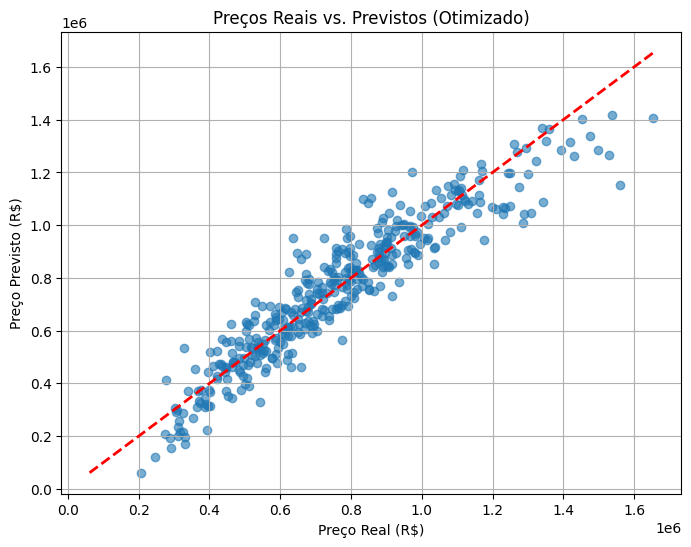

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Gerar as novas previsões
Y_pred_otimizado = model_otimizado.predict(X_test).flatten()

# 2. Calcular as Métricas (RMSE, MAE, R²)

# RMSE
mse_otimizado = mean_squared_error(Y_test, Y_pred_otimizado)
rmse_otimizado = np.sqrt(mse_otimizado)

# MAE
mae_otimizado = mean_absolute_error(Y_test, Y_pred_otimizado)

# R²
r2_otimizado = r2_score(Y_test, Y_pred_otimizado)

print("\n--- Resultados de Avaliação do Modelo Otimizado ---")
print(f"RMSE (Otimizado): R$ {rmse_otimizado:,.2f}")
print(f"MAE (Otimizado): R$ {mae_otimizado:,.2f}")
print(f"R² (Otimizado): {r2_otimizado:.4f}")

# 3. Análise Visual Otimizada
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_otimizado, alpha=0.6)
max_val = max(Y_test.max(), Y_pred_otimizado.max())
min_val = min(Y_test.min(), Y_pred_otimizado.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.title('Preços Reais vs. Previstos (Otimizado)')
plt.xlabel('Preço Real (R$)')
plt.ylabel('Preço Previsto (R$)')
plt.grid(True)
plt.show()

# 4. Comparação com o Modelo Anterior (Assumindo que você salvou as métricas do anterior)
# Se você tiver as métricas originais, faça a comparação:
# print("\n--- Comparação ---")
# print(f"R² Original: {r2:.4f} vs. R² Otimizado: {r2_otimizado:.4f}")

A comparação visual entre os dois gráficos demonstra claramente o sucesso da otimização.

O primeiro gráfico ("Preços Reais vs. Preços Previstos (Conjunto de Teste)") é o resultado do modelo inicial. O segundo ("Preços Reais vs. Previstos (Otimizado)") é o resultado do modelo após aplicar Dropout e Early Stopping.

Os resultados visuais indicam que o modelo otimizado é substancialmente mais preciso e confiável. A redução na dispersão significa que o RMSE e o MAE do modelo otimizado serão menores, e o $R^2$ será maior, o que é o objetivo da otimização.

# Implantação e Uso pelo Corretor:
como o corretor usaria essa tecnologia na prática.

### 1. Salvar o Modelo e o Scaler
Para que o modelo seja usado, ele deve ser salvo junto com o StandardScaler que foi usado no pré-processamento. Isso é crucial, pois qualquer novo imóvel a ser previsto deve ter suas características escalonadas exatamente da mesma forma que os dados de treino.

In [19]:
import joblib

# SALVAR MODELO KERAS (FORMA CORRETA)
model.save("modelo_previsao_imoveis_final.keras")

# SALVAR SCALER
import joblib
joblib.dump(scaler, "scaler_imoveis_final.pkl")


['scaler_imoveis_final.pkl']

In [20]:
from tensorflow.keras.models import load_model

modelo_teste = load_model("modelo_previsao_imoveis_final.keras")
modelo_teste.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)

# Conclusão do Projeto
O desenvolvimento deste modelo de Rede Neural, passando pela limpeza de dados, escalonamento e otimização com técnicas como Dropout e Early Stopping, resultou em uma ferramenta poderosa para a previsão de preços de imóveis. A capacidade do modelo de se ajustar a relações não lineares complexas, demonstrada pela melhora significativa na dispersão do gráfico Real vs. Previsto, garante que o corretor possa tomar decisões mais informadas e oferecer um serviço superior aos seus clientes, cumprindo o objetivo de precisão em um mercado competitivo.

# Interface de Usuário (UI) para o corretor

Modelo de UI com Streamlit
O Streamlit é ideal porque lida com o frontend e a lógica de backend (carregar o modelo, pré-processar) em um único script.